In [1]:
%matplotlib inline

# initialization
from rayoptics.environment import *

In [ ]:
double_lens_model = OpticalModel()
sm = double_lens_model['seq_model']
osp = double_lens_model['optical_spec']
pm = double_lens_model['parax_model']
em = double_lens_model['ele_model']
pt = double_lens_model['part_tree']

sm.do_apertures = False

# Put obj at WD
sm.gaps[0].thi = 14.15

sm.list_model()


              c            t        medium     mode   zdr      sd
  Obj:     0.000000      14.1500       air             1      1.0000
  Img:     0.000000      0.00000                       1      1.0000


In [ ]:
osp.pupil.value=8.0
listobj(osp['pupil'])
double_lens_model.update_model()

aperture: object epd; value=8.0



In [ ]:
# Add converging lens
double_lens_model.add_from_file("../data/codv_16955.seq", t=2)
sm.list_model()
pt.list_model()
front_lens = pt.obj_by_name('E1')
double_lens_model.flip(front_lens)
double_lens_model.update_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000      14.1500       air             1      1.0000
    1:     0.074322      11.2000     N-SF5             1      10.000
    2:     0.000000      2.00000       air             1      10.000
  Img:     0.000000      0.00000                       1      1.0000
root
├── Object
├── E1
└── Image


In [ ]:
# Add converging lens
double_lens_model.add_from_file("../data/codv_16960.seq", t=11.5)
sm.list_model()
pt.list_model()
double_lens_model.update_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000      14.1500       air             1      1.0000
    1:    -0.000000      11.2000     N-SF5             1      10.000
    2:    -0.074322      2.00000       air             1      10.000
    3:     0.049677      9.85724     N-SF6             1      12.500
    4:     0.000000      11.5000       air             1      12.500
  Img:     0.000000      0.00000                       1      1.0000
root
├── Object
├── E1
├── E2
└── Image


In [ ]:
# Add diverging lens
double_lens_model.add_from_file("../data/CODV_45015.seq", t=28)
sm.list_model()
pt.list_model()
#div_lens = pt.obj_by_name('E2')
#double_lens_model.flip(div_lens)
double_lens_model.update_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000      14.1500       air             1      1.0000
    1:    -0.000000      11.2000     N-SF5             1      10.000
    2:    -0.074322      2.00000       air             1      10.000
    3:     0.049677      9.85724     N-SF6             1      12.500
    4:     0.000000      11.5000       air             1      12.500
45015:    -0.106157      2.20000    N-SF11             1      5.5000
    6:     0.000000      28.0000       air             1      1.0000
  Img:     0.000000      0.00000                       1      1.0000
root
├── Object
├── E1
├── E2
├── E3
└── Image


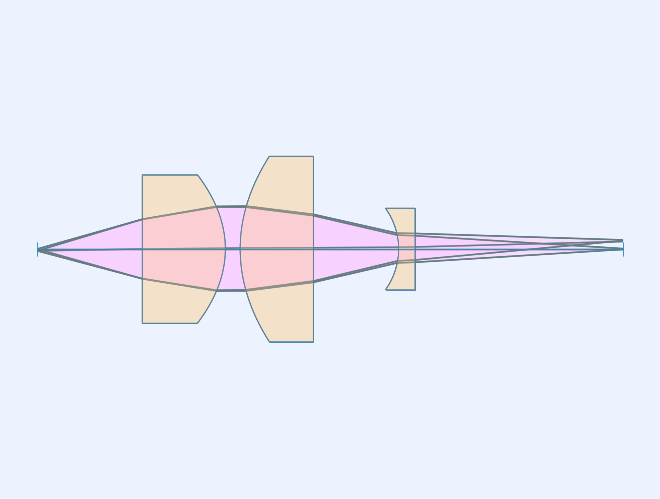

In [ ]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=double_lens_model,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

In [ ]:
pm.first_order_data()

efl               7.546
f                 7.546
f'                7.546
ffl              -11.31
pp1              -3.766
bfl              -5.447
ppk              -12.99
pp sep            27.53
f/#               4.703
m                -2.659
red             -0.3761
obj_dist          14.15
obj_ang               1
enp_dist             -0
enp_radius            4
na obj           0.2827
n obj                 1
img_dist          14.62
img_ht           0.6567
exp_dist         -23.87
exp_radius        2.668
na img          -0.1063
n img                 1
optical invariant      0.06982


In [12]:
total_distance = sum(gap.thi for gap in sm.gaps)
print(f"Total distance from object to image: {total_distance}")

optic_stack_length = sum(gap.thi for gap in sm.gaps[1:])
print(f"Total length of the optic stack from the front lens to the image plane: {optic_stack_length}")

Total distance from object to image: 78.90724134245758
Total length of the optic stack from the front lens to the image plane: 64.75724134245759
